#   Titanic Survival Analysis

###  Understanding Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/home/haider/Desktop/Office/Python/Projects/titanic-survival-analysis-EDA/data/train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

#### Data Types

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Count of null values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Data type of a specific column

In [6]:
print(df['Ticket'].dtype)

object


#### Number of non null values

In [7]:
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

#### General description of data

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Categorical Exploration

In [9]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_features)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


#### Handle Missing Values

In [10]:
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
df['Survived'] = df['Survived'].astype(bool)


In [12]:
df.drop('Embarked', axis=1, inplace=True)


In [13]:
df.drop('Ticket', axis=1, inplace=True)

In [14]:
df.drop('Name', axis=1, inplace=True)

#### Types of different Cabins

In [15]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [16]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [17]:
cabin_by_class = df[df['Cabin'].notnull()].groupby('Pclass')['Cabin'].unique()
print(cabin_by_class)

Pclass
1    [C85, C123, E46, C103, A6, C23 C25 C27, B78, D...
2                     [D56, F33, E101, F2, F4, D, E77]
3            [G6, F G73, F E69, E10, F G63, E121, F38]
Name: Cabin, dtype: object


In [18]:
df.loc[:, 'Cabin'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else np.nan)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,False,3,male,22.0,1,0,7.2500,NaN
1,2,True,1,female,38.0,1,0,71.2833,C
2,3,True,3,female,26.0,0,0,7.9250,NaN
3,4,True,1,female,35.0,1,0,53.1000,C
4,5,False,3,male,35.0,0,0,8.0500,NaN


In [19]:
cabin_by_class = df[df['Cabin'].notnull()].groupby('Pclass')['Cabin'].unique()
print(cabin_by_class)

Pclass
1    [C, E, A, B, D, T]
2             [D, F, E]
3             [G, F, E]
Name: Cabin, dtype: object


### Survivors of a specific Ticket Class

In [20]:
survivors_by_class = df[df['Survived'] == True]['Pclass'].value_counts().sort_index()

non_survivors_by_class = df[df['Survived'] == False]['Pclass'].value_counts().sort_index()

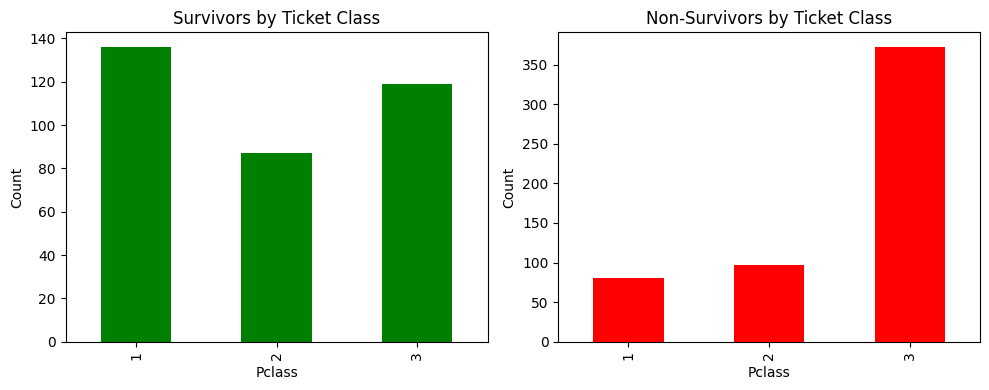

In [21]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
survivors_by_class.plot(kind='bar', color='green')
plt.title('Survivors by Ticket Class')
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
non_survivors_by_class.plot(kind='bar', color='red')
plt.title('Non-Survivors by Ticket Class')
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Survivors by gender

In [22]:
survivors_by_gender = df[df['Survived'] == True]['Sex'].value_counts().sort_index()

non_survivors_by_gender = df[df['Survived'] == False]['Sex'].value_counts().sort_index()

In [23]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

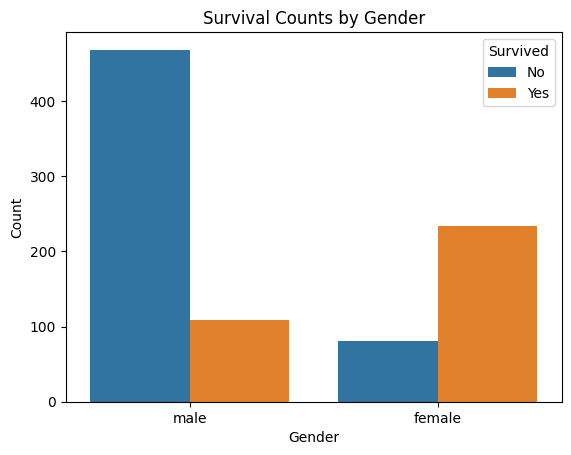

In [24]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Counts by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

### Survival Rate by gender

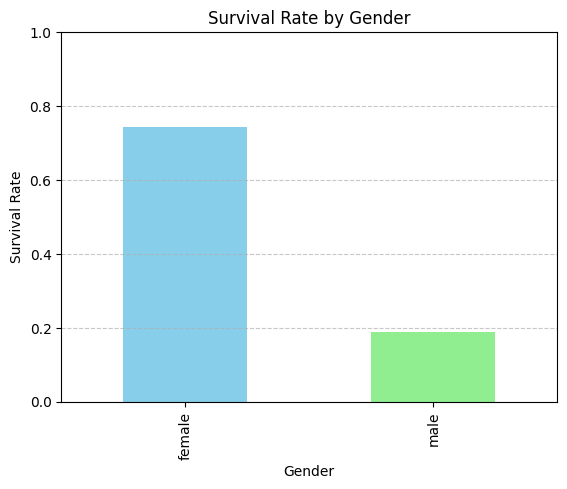

In [25]:
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean()


survival_rate_by_gender.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()